<a href="https://colab.research.google.com/github/U23200052/DATA/blob/main/Activity3_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [28]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [29]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [31]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [32]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [33]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-33-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [34]:
#merged_data.dtypes

In [35]:
pollution_data = merged_data[['pm10','neighborhood']]

In [36]:
pollution_data.shape[0]

118495

In [37]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [38]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [39]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [40]:
pollution_data['pm10'].min()

0.0

In [41]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [42]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [43]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [44]:
joined_table = joined_table.where('pm10', are.below(300))
joined_table

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park
0.73,Bronx Park
1.22,Bronx Park
5.82,Bronx Park
11.04,Bronx Park
1.29,Bronx Park


In [45]:
len(joined_table)

2

In [46]:
rows=joined_table.num_rows


In [47]:
sample=joined_table.sample(int(rows*0.1), with_replacement=False)


In [48]:
mean_pm10 = np.mean(sample.column('pm10'))
print(f"Mean PM10 of 10% sample = {mean_pm10:.2f}")

Mean PM10 of 10% sample = 16.13


<ipython-input-49-5d679742c14e>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


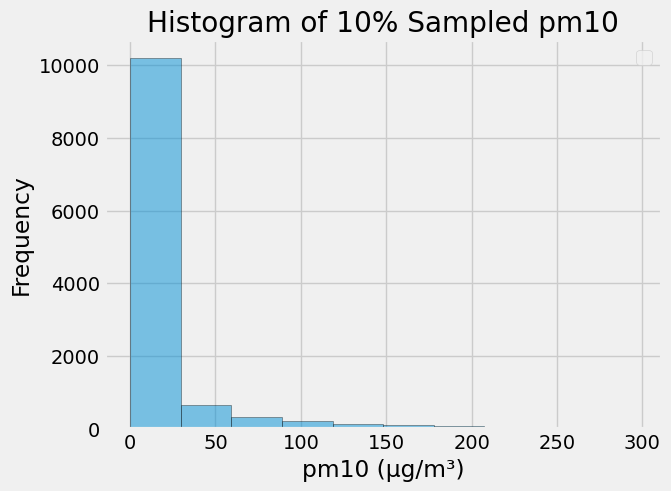

In [49]:
plt.hist(sample.column('pm10'),bins=10, alpha=0.5,edgecolor='black')

plt.xlabel('pm10 (µg/m³)')
plt.ylabel('Frequency')
plt.title('Histogram of 10% Sampled pm10')
plt.legend()
plt.show()

Mean PM10 of full dataset = 16.17


<ipython-input-50-34d456f8e5d5>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


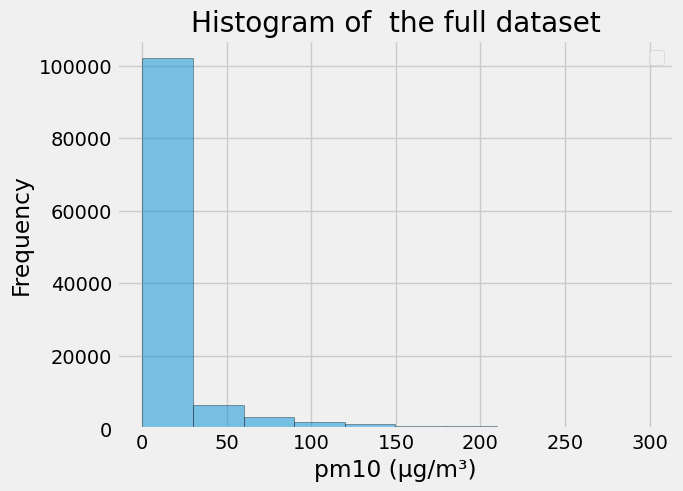

In [50]:
mean_pm10 = np.mean(joined_table.column('pm10'))
print(f"Mean PM10 of full dataset = {mean_pm10:.2f}")

plt.hist(joined_table.column('pm10'),bins=10, alpha=0.5,edgecolor='black')

plt.xlabel('pm10 (µg/m³)')
plt.ylabel('Frequency')
plt.title('Histogram of  the full dataset')
plt.legend()
plt.show()

### <font color = orange size  = 3>The histogram of the 10% sample closely mirrors that of the full dataset, both are strongly right-skewed, with a big peak at low PM₁₀ values and a long tail toward higher concentrations. This shows that a 10% random sample can be almost as effective as analyzing the entire dataset for capturing the key features of the PM₁₀ distribution.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [51]:
print(f"actual median = {percentile(50, joined_table.column('pm10')):.6f}")



actual median = 3.140000


In [52]:
def one_bootstrap_median():
    resampled_table = joined_table.sample()
    bootstrapped_median = percentile(50, resampled_table.column('pm10'))
    return bootstrapped_median

In [53]:
one_bootstrap_median()

3.1299999999999999

In [54]:
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append (bstrap_medians, one_bootstrap_median())

In [55]:
pop_median =percentile(50, joined_table.column('pm10'))

In [56]:
bstrap_medians

array([ 3.16,  3.14,  3.17, ...,  3.13,  3.14,  3.14])

In [57]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
data_min = bstrap_medians.min()
data_max = bstrap_medians.max()
bins = np.linspace(data_min, data_max, 30)   # 30 bins between min and max


In [58]:
left = percentile(2.5, bstrap_medians)
left

3.1000000000000001

In [59]:
right = percentile(97.5, bstrap_medians)
right

3.1899999999999999

### <font color = orange size  = 3> We are 95 % confident that the true median PM₁₀ concentration lies between 3.10 and 3.19 µg/m³—and our directly computed dataset median of 3.14 µg/m³ falls at the center of that interval, confirming the accuracy of our bootstrap procedure. In practical terms, this means that on at least half of all days, PM₁₀ levels are at or below just over 3 µg/m³—more than an order of magnitude cleaner than standard health thresholds (≈ 50 µg/m³)—and the narrow width of the confidence interval shows we can be highly certain that typical daily air quality is consistently excellent.

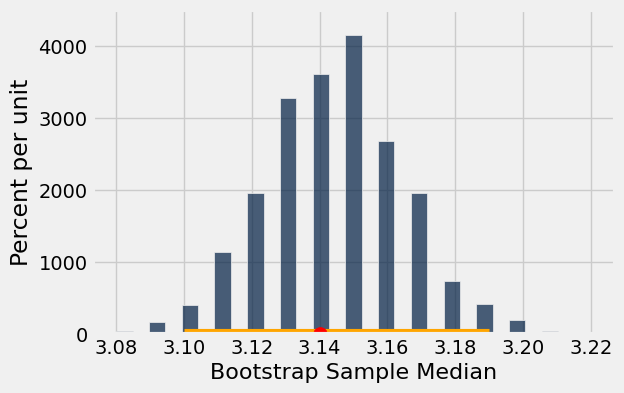

In [61]:
resampled_medians.hist(bins = bins)

# Plotting parameters; you can ignore this code
plt.ylim(0, 45)
plt.plot([left, right], [0, 0], color='orange', lw=8, zorder=1)
plt.scatter(pop_median, 0, color='red', s=100, zorder=2);

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [62]:
def one_bootstrap_mean():
    resample = joined_table.sample()
    return np.average(resample.column('pm10'))

In [63]:
one_bootstrap_mean()

16.159544377790652

In [64]:
# Generate means from 5000 bootstrap samples
num_repetitions = 5000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [65]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([ 15.9683055 ,  16.38233341])

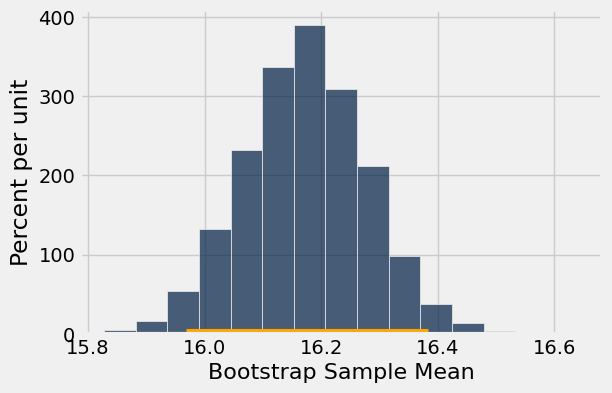

In [66]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plt.plot([left, right], [0, 0], color='orange', lw=8);

####<font color = orange size  = 3> We are 95% sure that the mean PM₁₀ concentration falls between 15.97 and 16.38 µg/m³. because 20 µg/m³ lies outside this interval, we reject the null hypothesis. This shows that the true average daily PM₁₀ is around 16 µg/m³, well below the 20 µg/m³ benchmark. indicating that air quality is significantly cleaner than the hypothesized level.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [67]:
temp = joined_table.group('neighborhood', np.mean)
temp = temp.sort('pm10 mean', descending=True)
top3 = temp.column('neighborhood')[:3]
print("Top 3 neighborhoods:", top3)


Top 3 neighborhoods: ['Crotona Park' 'Pelham Bay' 'Tremont']


In [68]:
def one_bootstrap_mean_nbhd(nbhd):
    # filter to that neighborhood, then resample
    resample = joined_table.where('neighborhood', are.equal_to(nbhd)).sample()
    return np.average(resample.column('pm10'))


In [69]:
num_repetitions = 5000
def nbh(nbhd):
    bstrap_means = make_array()
    for i in np.arange(num_repetitions):
        bstrap_means = np.append(bstrap_means, one_bootstrap_mean_nbhd(nbhd))
    return bstrap_means

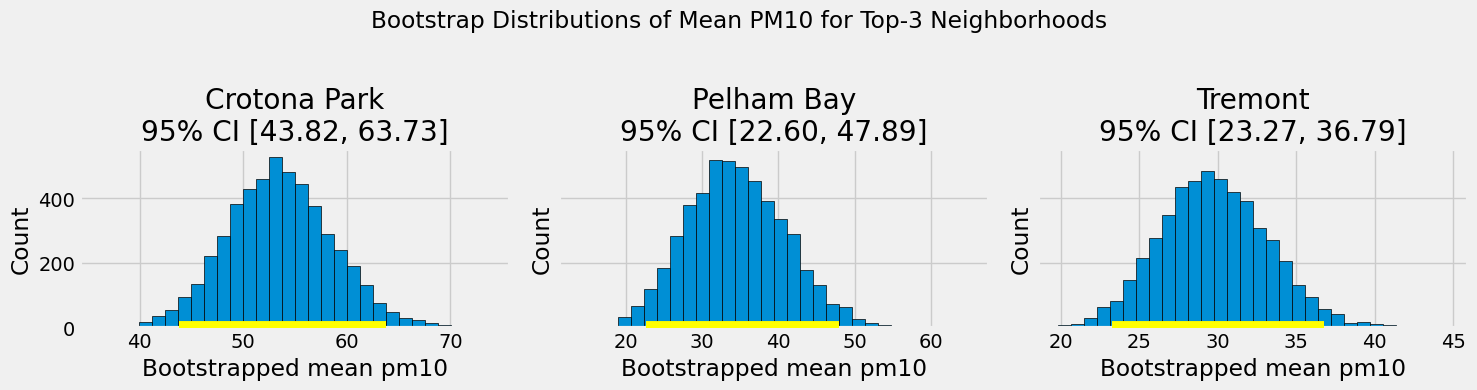

In [70]:
boot_means = { nbhd: nbh(nbhd) for nbhd in top3 }
cis = { nbhd: np.percentile(arr, [2.5, 97.5])
        for nbhd, arr in boot_means.items() }

fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

for idx, nbhd in enumerate(top3):
    arr = boot_means[nbhd]
    lo, hi = cis[nbhd]
    ax = axes[idx]

    # histogram of the 5 000 bootstrapped means
    ax.hist(arr, bins=30, edgecolor='black')
    ax.set_title(f"{nbhd}\n95% CI [{lo:.2f}, {hi:.2f}]")
    ax.set_xlabel('Bootstrapped mean pm10')
    ax.set_ylabel('Count')

    # horizontal yellow line at y=0 from lo→hi
    ax.hlines(0, lo, hi, colors='yellow', linewidth=10, zorder=3)

plt.suptitle("Bootstrap Distributions of Mean PM10 for Top-3 Neighborhoods")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.